In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/debasishnayak12/DATASETS/main/adult.csv")
df.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [35]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [36]:
category_cols=df.select_dtypes(include="O").columns

In [37]:
for i in category_cols:
    print(f"Unique value of {i} :")
    print(df[i].unique())
    print()

Unique value of workclass :
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique value of education :
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique value of marital-status :
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique value of occupation :
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique value of relationship :
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique value of race :
[' White' ' Black' ' Asian-Pac-Islander' ' Ame

In [25]:
cat_columns=[cols for cols in df.columns if df[cols].dtypes=="object"]
num_cols=[cols for cols in df.columns if df[cols].dtypes!="object"]

In [26]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier


In [27]:
l=LabelEncoder()
for col in cat_columns:
    df[col]=l.fit_transform(df[col])

In [28]:
X=df.drop(columns="salary",axis=1)
y=df[["salary"]]

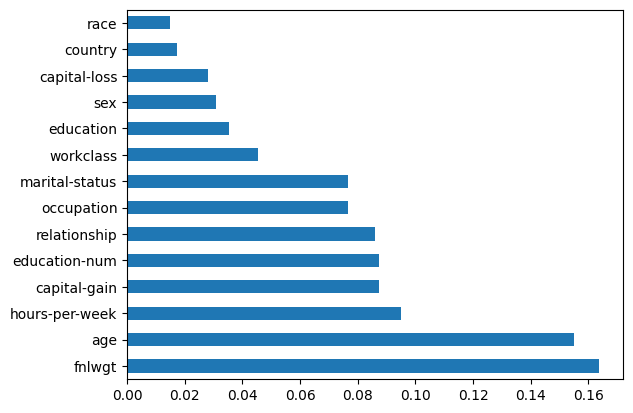

In [29]:
cl = ExtraTreesClassifier()
cl.fit(X, y)
feat_importances = pd.Series(cl.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Observation :
Here we observed sex,race,country,capital-loss is very very less contribute in model prediction so we can droppthose columns

In [30]:
X=X.drop(columns=['sex','race','capital-loss','country'],axis=1)

In [31]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,hours-per-week
0,39,7,77516,9,13,4,1,1,2174,40
1,50,6,83311,9,13,2,4,0,0,13
2,38,4,215646,11,9,0,6,1,0,40
3,53,4,234721,1,7,2,6,0,0,40
4,28,4,338409,9,13,2,10,5,0,40
